In [2]:
import pandas as pd
import networkx as nx
import os
import numpy as np
import ast
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
from scipy import stats
import ipycytoscape
import ipywidgets as widgets


os.chdir("/Users/Daniela/Documents/EPFLMasters/Winter2/Ada/Project/ada-2024-project-theadacuates")
print(os.getcwd())

SAVE_FOLDER =  "data/output/graph_data"

/Users/Daniela/Documents/EPFLMasters/Winter2/Ada/Project/ada-2024-project-theadacuates


## Graph Construction

#### Unweighted directed graph that contains all possible connections between articles

In [64]:
df_links_s = pd.read_csv('data/output/processed_data/links_simple_processed.csv')
df_a = pd.read_csv('data/output/processed_data/articles_processed.csv')
# using networkx to create graph
G = nx.DiGraph()

G.add_edges_from(zip(df_links_s['link_source'], df_links_s['link_target']))

metrics = {
    "node": list(G.nodes),
    "in_degree": [G.in_degree(n) for n in G.nodes],
    "out_degree": [G.out_degree(n) for n in G.nodes],
    "pagerank": list(nx.pagerank(G).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G).values()),
    "closeness_centrality": list(nx.closeness_centrality(G).values())
}


In [65]:

# graph_viz_full_network = ipycytoscape.CytoscapeWidget(G)
# display(graph_viz_full_network)


In [66]:
df_metrics = pd.DataFrame(metrics)
df_metrics.head(10)
df_metrics.to_csv(os.path.join(SAVE_FOLDER, "all_connections_graph_metrics.csv"), index = False)

In [67]:
df_metrics.describe()

,in_degree,out_degree,pagerank,betweenness_centrality,closeness_centrality
count,4592.000000,4592.000000,4592.000000,4592.000000,4592.000000
mean,26.106707,26.106707,0.000218,0.000423,0.284830
std,62.814636,24.196411,0.000432,0.001981,0.116919
min,0.000000,0.000000,0.000033,0.000000,0.000000
25%,2.000000,11.000000,0.000044,0.000006,0.263160
50%,8.000000,19.000000,0.000087,0.000061,0.313644
75%,25.000000,33.000000,0.000216,0.000305,0.354093
max,1551.000000,294.000000,0.009566,0.094090,0.590353


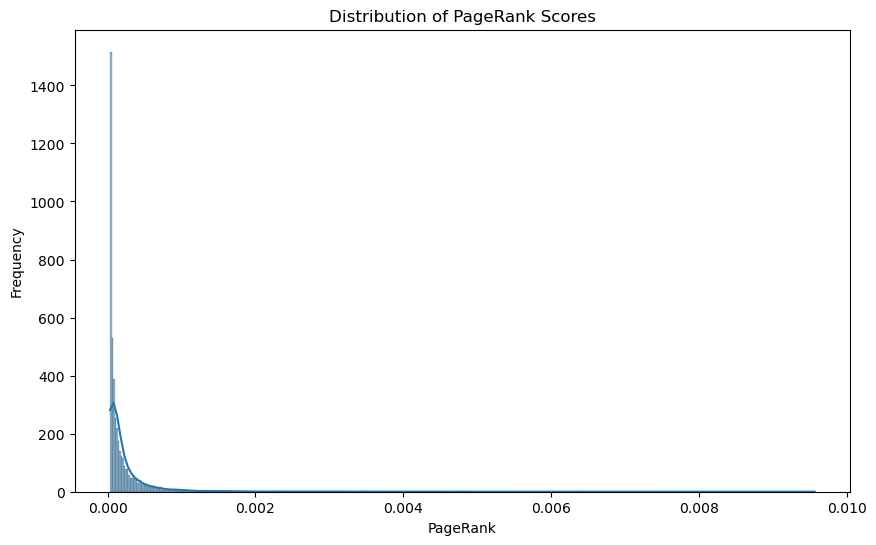

In [68]:
plt.figure(figsize=(10, 6))
sns.histplot(df_metrics['pagerank'], kde=True)
plt.title("Distribution of PageRank Scores")
plt.xlabel("PageRank")
plt.ylabel("Frequency")
plt.show()

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_26869/1618629225.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


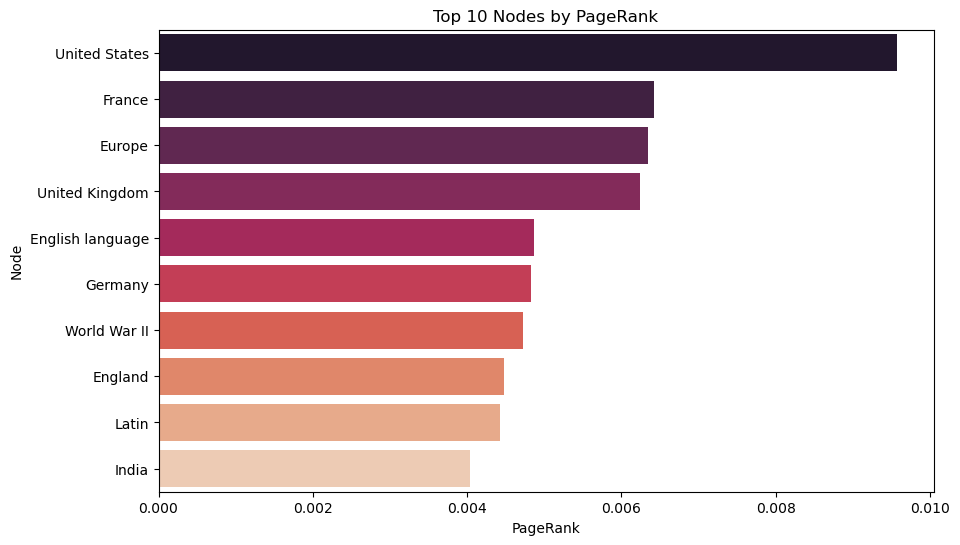

In [69]:
top_pagerank = df_metrics.sort_values(by="pagerank", ascending=False).head(10)
sns.set_palette("rocket", len(top_pagerank))  # You can choose other palettes like "rocket", "magma", etc.


plt.figure(figsize=(10, 6))
sns.barplot(
    x="pagerank", 
    y="node", 
    data=top_pagerank, 
    palette="rocket"
)
plt.xlabel("PageRank")
plt.ylabel("Node")
plt.title("Top 10 Nodes by PageRank")
plt.show()

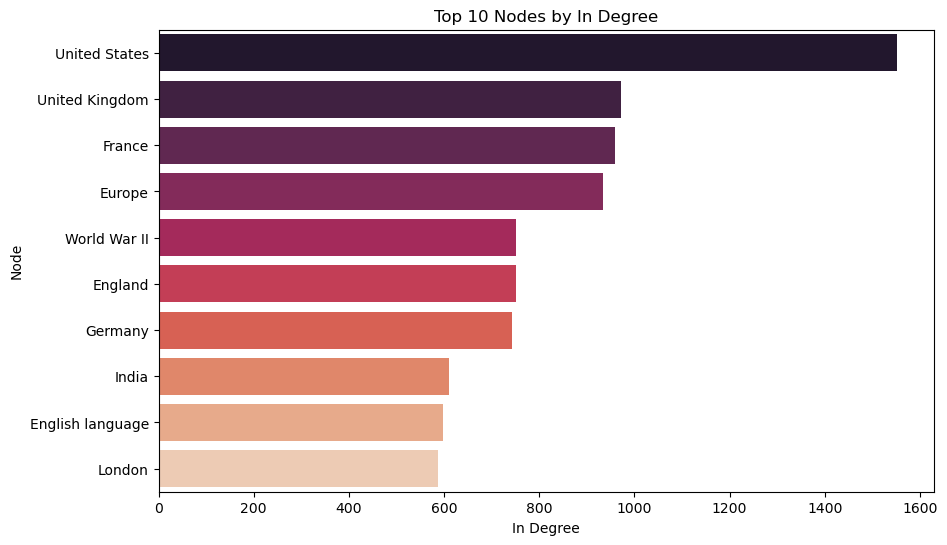

In [70]:
top_in_degree = df_metrics.sort_values(by="in_degree", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="in_degree", 
    y="node", 
    data=top_in_degree,
    hue="node",
    palette="rocket"
)
plt.xlabel("In Degree")
plt.ylabel("Node")
plt.title("Top 10 Nodes by In Degree")
plt.show()

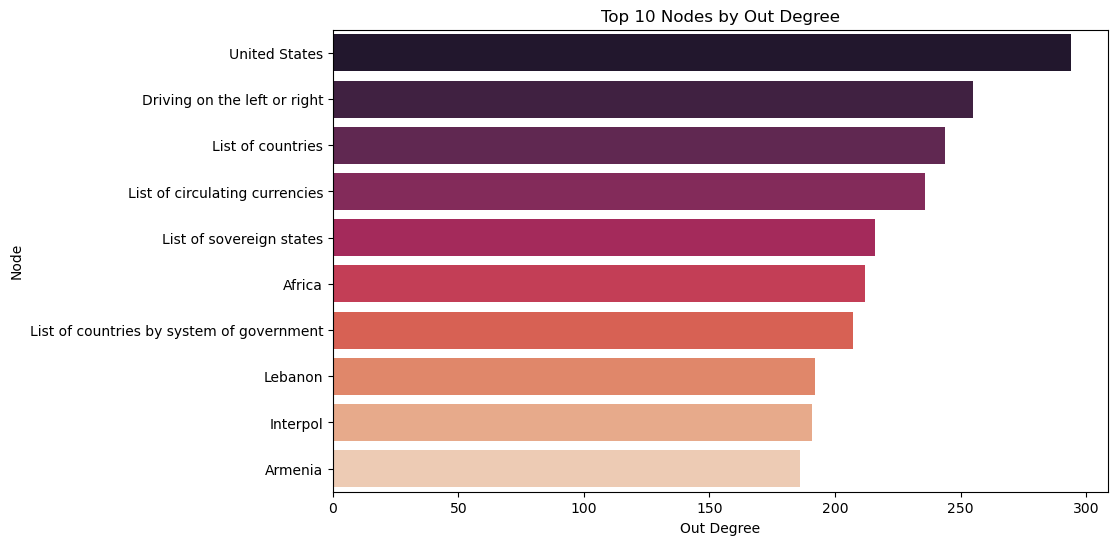

In [71]:
top_out_degree = df_metrics.sort_values(by="out_degree", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="out_degree", 
    y="node", 
    data=top_out_degree,
    hue="node",
    palette="rocket"
)
plt.xlabel("Out Degree")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Out Degree")
plt.show()

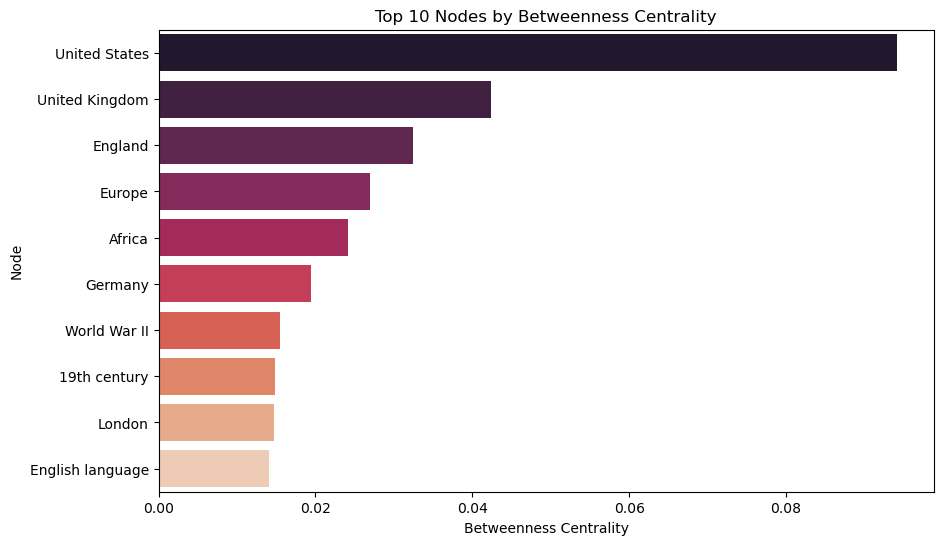

In [72]:
top_betweenness_centrality= df_metrics.sort_values(by="betweenness_centrality", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="betweenness_centrality", 
    y="node", 
    data=top_betweenness_centrality,
    hue="node", 
    palette="rocket"
)
plt.xlabel("Betweenness Centrality")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Betweenness Centrality")
plt.show()

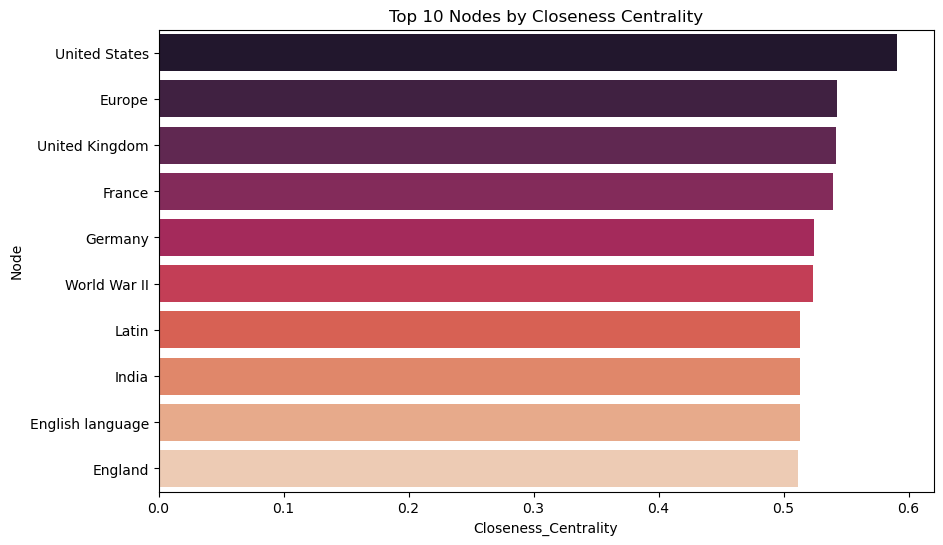

In [73]:
top_closeness_centrality= df_metrics.sort_values(by="closeness_centrality", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(
    x="closeness_centrality", 
    y="node", 
    data=top_closeness_centrality,
    hue="node",
    palette="rocket"
)
plt.xlabel("Closeness_Centrality")
plt.ylabel("Node")
plt.title("Top 10 Nodes by Closeness Centrality")
plt.show()

### Played Games graph

In [4]:
#need to make a played links list that I can later use to make weighted and unweighted graphs
df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')

## this is an easy way to convert the object in resolve_path_list_name to an array of strings :D
links_list =[]
for path in df_all['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

all_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

all_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "all_played_links_simple.csv"), index = False)

all_played_links_df.head(10)

finished_paths_df = df_all[df_all['finished'] == True]
links_list =[]
for path in finished_paths_df['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

finished_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

finished_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "finished_played_links_simple.csv"), index = False)

unfinished_paths_df = df_all[df_all['finished'] == False]
links_list =[]
for path in unfinished_paths_df['resolved_path_list_name'].apply(ast.literal_eval):
  for n in range(len(path)-1):
    source = path[n]
    target = path[n+1]
    links_list.append((source, target))

unfinished_played_links_df = pd.DataFrame(links_list, columns=['source', 'target'])

unfinished_played_links_df.to_csv(os.path.join(SAVE_FOLDER, "unfinished_played_links_simple.csv"), index = False)


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_97945/572921846.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')


#### Unweighted directed graph that contains all connections made by humans when playing wikispeedia

In [5]:
G_all_p = nx.DiGraph()

G_all_p.add_edges_from(zip(all_played_links_df['source'], all_played_links_df['target']))

all_p_metrics = {
    "node": list(G_all_p.nodes),
    "in_degree": [G_all_p.in_degree(n) for n in G_all_p.nodes],
    "out_degree": [G_all_p.out_degree(n) for n in G_all_p.nodes],
    "pagerank": list(nx.pagerank(G_all_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_all_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_all_p).values())
}

In [76]:
df_all_p_metrics = pd.DataFrame(all_p_metrics)
df_all_p_metrics.head(10)
df_all_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "all_played_connections_graph_metrics.csv"), index = False)

#### Creating a Weighted directed graph that contains all connections made by humans
Need to take the list of edges created above to 
1) count repetitions to know the frequency of each edge to use as weights
2) add these edges with weights to a graph

In [77]:
# all played linked dataframe
all_played_links_df.head(2)
df_all_played_edge_weights = all_played_links_df.groupby(["source", "target"]).size().reset_index(name="weight")
df_all_played_edge_weights.head(3)
df_all_played_edge_weights.to_csv(os.path.join(SAVE_FOLDER, "all_played_weighted_graph.csv"))





### Weighted graph of all played games

In [78]:
#faster way to create the graph, making tuples
edge_weights = list(df_all_played_edge_weights.itertuples(index=False, name=None))
w_G_all_p = nx.DiGraph()
w_G_all_p.add_weighted_edges_from(edge_weights)


#### Top edges of allplayed games

In [79]:
top_edges = sorted(w_G_all_p.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
df_top_edges = pd.DataFrame(top_edges, columns=['source', 'target', 'attrib'])
#weights is inside attrib so we need to get it out...
df_top_edges['weight'] = df_top_edges['attrib'].apply(lambda x: x['weight'])
df_top_edges = df_top_edges.drop(columns=['attrib'])
df_top_edges

,source,target,weight
0,Animal,Mammal,752
1,North America,United States,734
2,Brain,Computer science,709
3,Europe,United Kingdom,647
4,United States,President of the United States,558
5,United Kingdom,England,540
6,Communication,Telephone,539
7,United States,North America,515
8,England,Europe,484
9,Mammal,Zebra,477


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_26869/3022511127.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top_edges, x='weight', y=df_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),


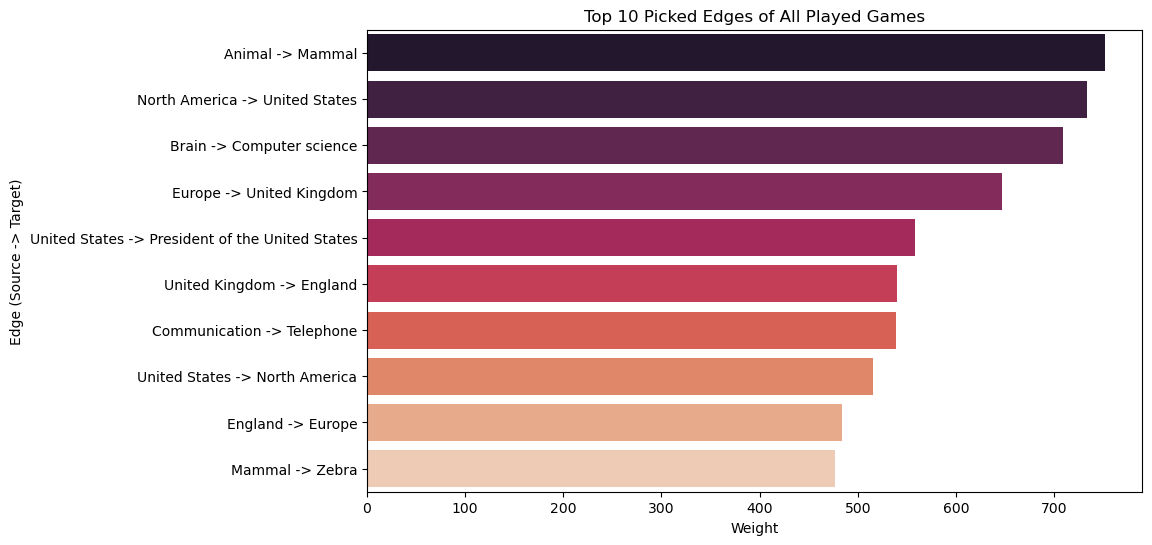

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_top_edges, x='weight', y=df_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),
    palette="rocket")
plt.title("Top 10 Picked Edges of All Played Games")
plt.xlabel("Weight")
plt.ylabel("Edge (Source -> Target)")
plt.show()

In [6]:
G_fin_p = nx.DiGraph()

G_fin_p.add_edges_from(zip(finished_played_links_df['source'], finished_played_links_df['target']))

fin_p_metrics = {
    "node": list(G_fin_p.nodes),
    "in_degree": [G_fin_p.in_degree(n) for n in G_fin_p.nodes],
    "out_degree": [G_fin_p.out_degree(n) for n in G_fin_p.nodes],
    "pagerank": list(nx.pagerank(G_fin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_fin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_fin_p).values())
}

In [82]:
df_fin_p_metrics = pd.DataFrame(fin_p_metrics)
df_fin_p_metrics.head(10)
df_fin_p_metrics.to_csv(os.path.join(SAVE_FOLDER, "finished_played_connections_graph_metrics.csv"), index = False)

In [83]:
# finished games link dataframe
finished_played_links_df
df_finished_edge_weights = finished_played_links_df.groupby(["source", "target"]).size().reset_index(name="weight")
print(df_finished_edge_weights.head(3))
df_finished_edge_weights.to_csv(os.path.join(SAVE_FOLDER, "finished_weighted_graph.csv"))


    source                target  weight
0  1 Ceres                3 Juno       2
1  1 Ceres              Asteroid       6
2  1 Ceres  Carl Friedrich Gauss       1


In [84]:
#faster way to create the graph, making tuples
f_edge_weights = list(df_finished_edge_weights.itertuples(index=False, name=None))
w_G_fin_p = nx.DiGraph()
w_G_fin_p.add_weighted_edges_from(f_edge_weights)

In [85]:
f_top_edges = sorted(w_G_fin_p.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
df_f_top_edges = pd.DataFrame(f_top_edges, columns=['source', 'target', 'attrib'])
#weights is inside attrib so we need to get it out...
df_f_top_edges['weight'] = df_f_top_edges['attrib'].apply(lambda x: x['weight'])
df_f_top_edges = df_f_top_edges.drop(columns=['attrib'])
df_f_top_edges

,source,target,weight
0,North America,United States,536
1,Communication,Telephone,536
2,Animal,Mammal,529
3,Europe,United Kingdom,490
4,United States,President of the United States,490
5,Lion,Zebra,473
6,Brain,Computer science,473
7,Mammal,Zebra,468
8,Norway,Viking,415
9,United Kingdom,England,400


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_26869/1231068495.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_f_top_edges, x='weight', y=df_f_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),


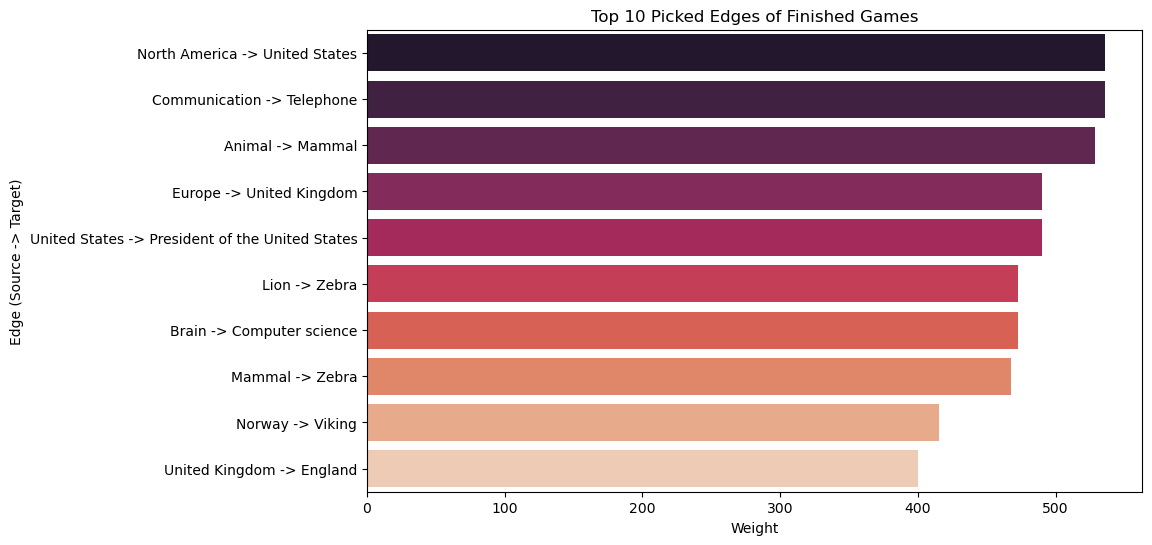

In [86]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_f_top_edges, x='weight', y=df_f_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),
    palette="rocket")
plt.title("Top 10 Picked Edges of Finished Games")
plt.xlabel("Weight")
plt.ylabel("Edge (Source -> Target)")
plt.show()

In [87]:
# fin_g = ipycytoscape.CytoscapeWidget()
# fin_g.graph.add_graph_from_networkx(G_fin_p)


In [7]:
G_unfin_p = nx.DiGraph()

G_unfin_p.add_edges_from(zip(unfinished_played_links_df['source'], unfinished_played_links_df['target']))

unfin_p_metrics = {
    "node": list(G_unfin_p.nodes),
    "in_degree": [G_unfin_p.in_degree(n) for n in G_unfin_p.nodes],
    "out_degree": [G_unfin_p.out_degree(n) for n in G_unfin_p.nodes],
    "pagerank": list(nx.pagerank(G_unfin_p).values()),
    "betweenness_centrality": list(nx.betweenness_centrality(G_unfin_p).values()),
    "closeness_centrality": list(nx.closeness_centrality(G_unfin_p).values())
}

In [89]:
df_unfin_pmetrics = pd.DataFrame(unfin_p_metrics)
df_unfin_pmetrics.head(10)
df_unfin_pmetrics.to_csv(os.path.join(SAVE_FOLDER, "unfinished_played_connections_graph_metrics.csv"), index = False)

In [90]:
# finished games link dataframe
unfinished_played_links_df
df_unfinished_edge_weights = unfinished_played_links_df.groupby(["source", "target"]).size().reset_index(name="weight")
print(df_unfinished_edge_weights.head(3))
df_unfinished_edge_weights.to_csv(os.path.join(SAVE_FOLDER, "unfinished_weighted_graph.csv"))



    source                target  weight
0  1 Ceres              Asteroid       4
1  1 Ceres  Carl Friedrich Gauss       2
2  1 Ceres               Germany      11


In [91]:
#faster way to create the graph, making tuples
uf_edge_weights = list(df_unfinished_edge_weights.itertuples(index=False, name=None))
w_G_unfin_p = nx.DiGraph()
w_G_unfin_p.add_weighted_edges_from(uf_edge_weights)

In [92]:
uf_top_edges = sorted(w_G_unfin_p.edges(data=True), key=lambda x: x[2]['weight'], reverse=True)[:10]
df_uf_top_edges = pd.DataFrame(uf_top_edges, columns=['source', 'target', 'attrib'])
#weights is inside attrib so we need to get it out...
df_uf_top_edges['weight'] = df_uf_top_edges['attrib'].apply(lambda x: x['weight'])
df_uf_top_edges = df_uf_top_edges.drop(columns=['attrib'])
df_uf_top_edges

,source,target,weight
0,Pyramid,Mexico,290
1,Brain,Computer science,236
2,Animal,Mammal,223
3,North America,United States,198
4,Europe,United Kingdom,157
5,United Kingdom,England,140
6,Computer science,Internet,140
7,Brain,Cell (biology),137
8,Agriculture,Soybean,137
9,English language,United States,130


/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_26869/596799605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_uf_top_edges, x='weight', y=df_uf_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),


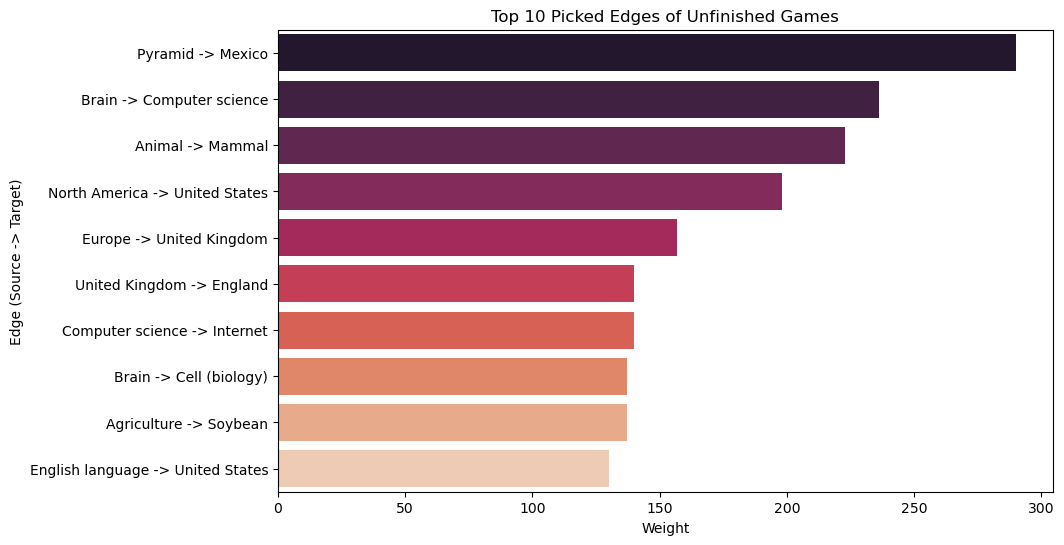

In [93]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_uf_top_edges, x='weight', y=df_uf_top_edges.apply(lambda row: f"{row['source']} -> {row['target']}", axis=1),
    palette="rocket")
plt.title("Top 10 Picked Edges of Unfinished Games")
plt.xlabel("Weight")
plt.ylabel("Edge (Source -> Target)")
plt.show()

In [94]:
# unfin_g = ipycytoscape.CytoscapeWidget()
# unfin_g.graph.add_graph_from_networkx(G_unfin_p)
# display(unfin_g)

Intro: BFS Vs human → humans always longer  (DANI)
Human have cognitive load while machine not → indeed if we observe there is big difference of perfume → does this delta is caused by cognitive load or no?

“Despite the lack of global knowledge, humans are good at con-
necting the dots: the median human game path is only one click
longer than the median optimal solution.”
Humans, unlike algorithms like BFS (Breadth-First Search), rely on heuristics and are subject to cognitive constraints. When faced with navigation tasks (such as moving from one article to another), humans typically favor familiar or high-connectivity nodes (hubs) due to efficiency heuristics. This is consistent with models of bounded rationality, which suggest that humans do not explore all possible paths, but rather take shortcuts based on prior knowledge and salient options, even if those are not optimal.


Just fast connectivity
Show graphs
Connected articles graph (unweighted)(directed)
Strength of connection taken by humans(weighted)(directed)
Interactive graph that, chosen one game, shows
BFS path
Multiple human paths
Gephi: https://medium.com/@vespinozag/how-to-publish-your-gephi-network-to-the-web-7d6a5f84076d  
Show metrics 
order by the biggest 
split by: category, finish/unfinished, 
Centrality
Betwee-cnetralyt
Closeness
pageRank
In out degree
Explore this metric “Curvature” 
describes the context of the links that are clicked, within the network. If we click a link with a high curvature, we’re in a very well connected part of the network.

…

CONNECTIVITY PER CATEGORY
How many paths start from one cat and end into another
Which is the faction of finished/unisedh


#### sanity checks

In [ ]:
print("num nodes fin graph:",G_fin_p.number_of_nodes())
print("num nodes weighted fin graph:",w_G_fin_p.number_of_nodes())
print("num nodes unfin graph:",G_unfin_p.number_of_nodes())
print("num nodes weighted unfin graph:",w_G_unfin_p.number_of_nodes())
print("num nodes all played graph:",G_all_p.number_of_nodes())
print("num nodes weighted all played graph:",w_G_all_p.number_of_nodes())

num nodes fin graph: 4169
num nodes weighted fin graph: 4169


### creating the shortest path matrix for all played games

In [ ]:
#we need this to ge the order in which nodes appear in the graph and then use this list name to use the names vs the index number
article_names = list(G_all_p.nodes)
article_names
df_article_names = pd.DataFrame(article_names, columns=["article_name"])
df_article_names.head(10)

,article_name
0,14th century
1,15th century
2,16th century
3,Pacific Ocean
4,Atlantic Ocean
5,Accra
6,Africa
7,Atlantic slave trade
8,African slave trade
9,Europe


In [11]:
shortest_path_all_played = nx.floyd_warshall_numpy(G_all_p, weight=None)

# Display the shortest path matrix for all played graph
print(shortest_path_all_played)

[[ 0.  1.  2. ... inf inf inf]
 [ 1.  0.  1. ... inf inf inf]
 [ 2.  1.  0. ... inf inf inf]
 ...
 [ 3.  3.  3. ...  0. inf inf]
 [ 3.  3.  3. ... inf  0. inf]
 [ 3.  2.  3. ... inf inf  0.]]


In [ ]:
#change the inf to nans
shortest_path_all_played[np.isinf(shortest_path_all_played)] = np.nan
shortest_path_all_played

array([[ 0.,  1.,  2., ..., nan, nan, nan],
       [ 1.,  0.,  1., ..., nan, nan, nan],
       [ 2.,  1.,  0., ..., nan, nan, nan],
       ...,
       [ 3.,  3.,  3., ...,  0., nan, nan],
       [ 3.,  3.,  3., ..., nan,  0., nan],
       [ 3.,  2.,  3., ..., nan, nan,  0.]])

In [ ]:
#savind the matrix in the same format as how we saved our BFS matrix!  using article_names as the indeces vs their node number on the graphs
df_shortest_path_all_played = pd.DataFrame(shortest_path_all_played, index=df_article_names["article_name"], columns=df_article_names["article_name"])
df_shortest_path_all_played.to_csv(os.path.join(SAVE_FOLDER, "shortest_path_all_played_matrix.csv"))


### creating shortest path matrix for finished games

In [20]:
#we need this to ge the order in which nodes appear in the graph and then use this list name to use the names vs the index number
article_names = list(G_fin_p.nodes)
article_names
df_article_names = pd.DataFrame(article_names, columns=["article_name"])
shortest_path_finished = nx.floyd_warshall_numpy(G_fin_p, weight=None)
#change the inf to nans
shortest_path_finished[np.isinf(shortest_path_finished)] = np.nan
shortest_path_finished

array([[ 0.,  1.,  2., ..., nan, nan, nan],
       [ 1.,  0.,  1., ..., nan, nan, nan],
       [ 2.,  1.,  0., ..., nan, nan, nan],
       ...,
       [ 3.,  3.,  3., ...,  0., nan, nan],
       [ 3.,  3.,  3., ..., nan,  0., nan],
       [ 3.,  2.,  3., ..., nan, nan,  0.]])

In [22]:
df_shortest_path_finished = pd.DataFrame(shortest_path_finished,index=df_article_names["article_name"], columns=df_article_names["article_name"])
df_shortest_path_finished.to_csv(os.path.join(SAVE_FOLDER, "shortest_path_finished_matrix.csv"))

### creating shortes path matrix for unfinished games

In [23]:
#we need this to ge the order in which nodes appear in the graph and then use this list name to use the names vs the index number
article_names = list(G_unfin_p.nodes)
article_names
df_article_names = pd.DataFrame(article_names, columns=["article_name"])
shortest_path_unfinished = nx.floyd_warshall_numpy(G_unfin_p, weight=None)
#change the inf to nans
shortest_path_unfinished[np.isinf(shortest_path_unfinished)] = np.nan


In [25]:
df_shortest_path_unfinished = pd.DataFrame(shortest_path_unfinished, index=df_article_names["article_name"], columns=df_article_names["article_name"])
df_shortest_path_unfinished.to_csv(os.path.join(SAVE_FOLDER, "shortest_path_unfinished_matrix.csv"))

## We have our relevant matrices
- bfs_matrix is the shortest path in the whole article network of wikispeedia
- path_processed has the paths and the n_clicks which is the path length

In [47]:
# Load the BFS matrix from CSV
bfs_matrix = pd.read_csv('data/output/processed_data/bfs_matrix.csv', index_col=0) 

print(bfs_matrix.at['10th century', 'United States'])

2.0


In [55]:
bfs_matrix.max().max()

9.0

In [48]:
#need to make a played links list that I can later use to make weighted and unweighted graphs
df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')
df_fin = df_all[df_all["finished"] == True]

/var/folders/cp/xh9f4s6s71g1624n5327v0_c0000gn/T/ipykernel_97945/1608758826.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_all = pd.read_csv('data/output/processed_data/paths_processed.csv')


In [57]:
#find all the played games and calculate the min, max and average path length (if there are many)
human_played_finished_games = {
    "source": df_fin['source_link'],
    "target": df_fin['target_link'],
    "n_clicks": df_fin['n_click']
}
human_played_finished_games
optimal_path_lengths = [ bfs_matrix.at[source, target] if source in bfs_matrix.index and target in bfs_matrix.columns else np.nan
                        for source, target in zip(df_fin["source_link"], df_fin["target_link"])]

human_played_finished_games["optimal_distance"] = optimal_path_lengths

df_human_played_finished = pd.DataFrame(human_played_finished_games)
df_human_played_finished.head(10)
print (df_human_played_finished["optimal_distance"].max())
print(df_human_played_finished["n_clicks"].max())

df_human_played_finished.head(10)

6.0
435


,source,target,n_clicks,optimal_distance
0,14th century,African slave trade,9,3.0
1,14th century,African slave trade,5,3.0
2,14th century,African slave trade,8,3.0
3,14th century,Greece,4,2.0
4,14th century,John F. Kennedy,7,3.0
5,14th century,John F. Kennedy,6,3.0
6,14th century,Fire,4,3.0
7,14th century,Rainbow,6,3.0
8,14th century,Rainbow,4,3.0
9,14th century,Rainbow,7,3.0


In [108]:
#agregate by source target pair and ge the min, max, mean to compare w optimal, median is probs better...

agg_human_played_finished = df_human_played_finished.groupby(["source", "target"]).agg(
  num_games = ("n_clicks", "size"),
  min_path_length = ("n_clicks", "min"),
  max_path_length = ("n_clicks", "max"),
  mean_path_length = ("n_clicks", "mean"),
  median_path_length = ("n_clicks", "median"),
  optimal_path_length = ("optimal_distance", "first")
).reset_index()
agg_human_played_finished.head()

#agg_human_played_finished[agg_human_played_finished['num_games'] == agg_human_played_finished['num_games'].max()]

,source,target,num_games,min_path_length,max_path_length,mean_path_length,median_path_length,optimal_path_length
0,1 Ceres,Indian Ocean,1,5,5,5.0,5.0,3.0
1,1 Ceres,John Locke,2,5,7,6.0,6.0,3.0
2,1 Ceres,London,2,5,9,7.0,7.0,2.0
3,1 Ceres,"Miami, Florida",1,3,3,3.0,3.0,2.0
4,1 Ceres,Sputnik 2,1,8,8,8.0,8.0,4.0


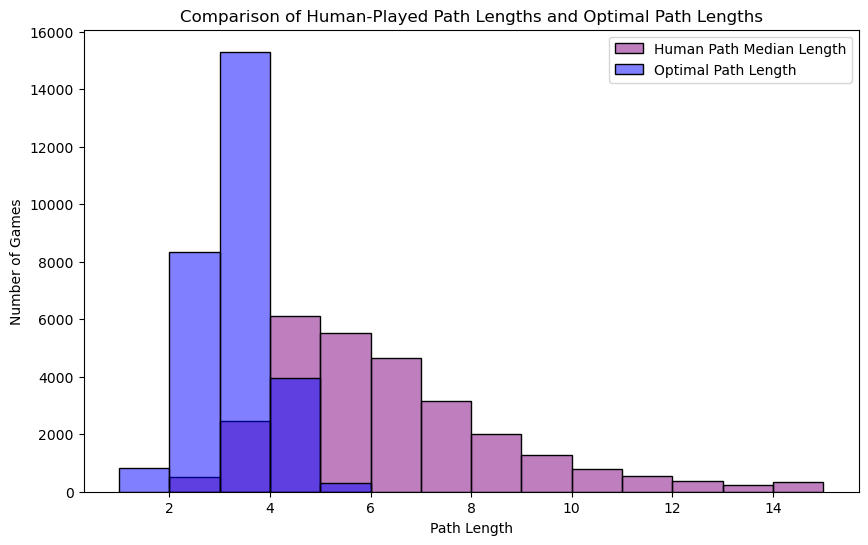

In [109]:
human_lengths = agg_human_played_finished[agg_human_played_finished["median_path_length"] <= 15]["median_path_length"]
optimal_path_lengths = agg_human_played_finished["optimal_path_length"]

#maybe a histogram?
plt.figure(figsize=(10,6))

sns.histplot(human_lengths, color='purple', label='Human Path Median Length', binwidth=1, alpha=0.5)
sns.histplot(optimal_path_lengths, color='blue', label='Optimal Path Length', binwidth=1, alpha=0.5)

plt.xlabel("Path Length")
plt.ylabel("Number of Games")
plt.title("Comparison of Human-Played Path Lengths and Optimal Path Lengths")
plt.legend()

plt.show()

## Comparing median Human Path Length to Optimal Path Length

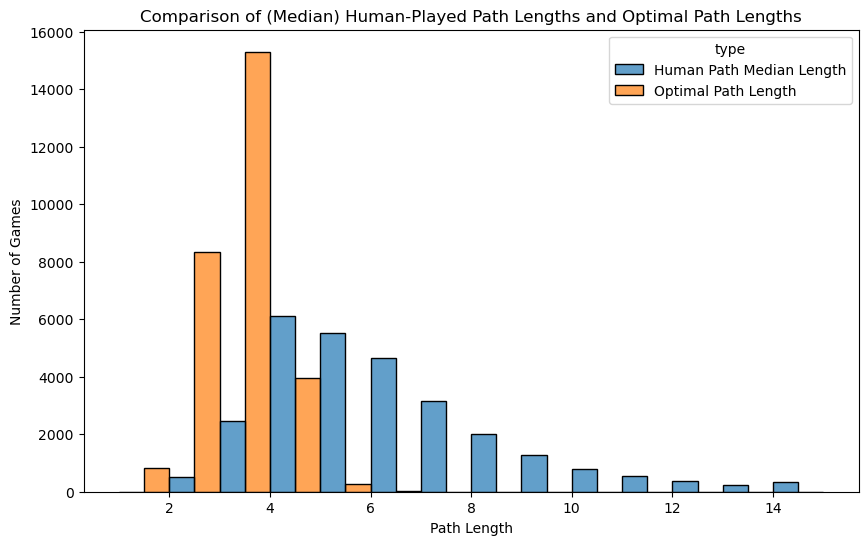

In [110]:
#NEED TO put all in one df to get a side bt side
path_lengths_df = pd.DataFrame({
    "path_length": pd.concat([human_lengths, optimal_path_lengths], ignore_index=True),
    "type": ["Human Path Median Length"] * len(human_lengths) + ["Optimal Path Length"] * len(optimal_path_lengths)
})

plt.figure(figsize=(10, 6))
sns.histplot(data=path_lengths_df, x="path_length", hue="type", multiple="dodge", binwidth=1, alpha=0.7)

# Labels and title
plt.xlabel("Path Length")
plt.ylabel("Number of Games")
plt.title("Comparison of (Median) Human-Played Path Lengths and Optimal Path Lengths")
#plt.legend(title="Path Type")

plt.show()

In [111]:
# looking at an outlier...
agg_human_played_finished[agg_human_played_finished['max_path_length'] == 435]

,source,target,num_games,min_path_length,max_path_length,mean_path_length,median_path_length,optimal_path_length
26818,United States,English language,15,3,435,31.933333,3.0,2.0


In [112]:
# how different are the median and the optimal path lengths?
agg_human_played_finished['median_diff_from_optimal'] = (agg_human_played_finished['median_path_length'] - agg_human_played_finished['optimal_path_length'])
overall_median_diff = agg_human_played_finished['median_diff_from_optimal'].median()
print("The overall MEDIAN difference of human played games from optimal path length is ", overall_median_diff)

The overall MEDIAN difference of human played games from optimal path length is  3.0


### The overall median difference of human played games from optimal path length is 3!

This shows that in general, humans are not too far from the optimal paths but usually take a few jumps more to reach the target

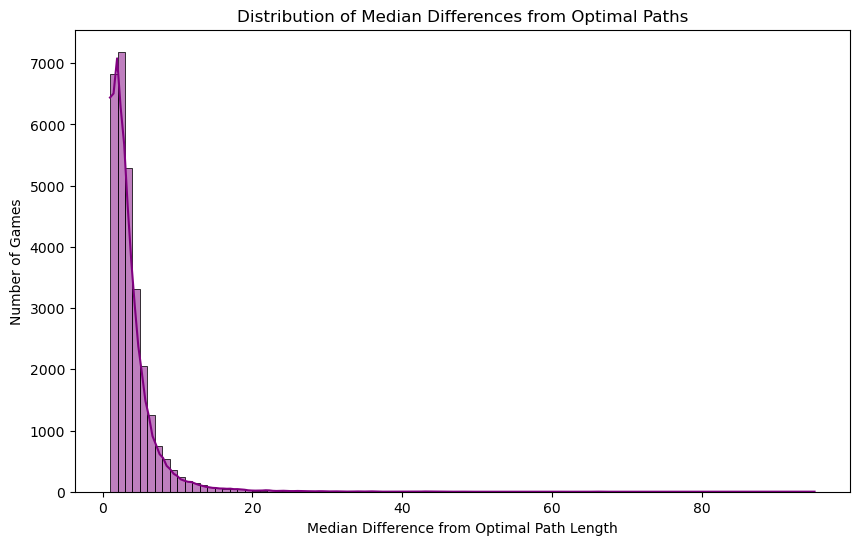

In [113]:
# let's look at distribution of the median difference from optimal
plt.figure(figsize=(10,6))

sns.histplot(agg_human_played_finished['median_diff_from_optimal'], binwidth=1, color="purple", kde=True)

plt.xlabel("Median Difference from Optimal Path Length")
plt.ylabel("Number of Games")
plt.title("Distribution of Median Differences from Optimal Paths")
plt.show()

there are a few games with a very big deviation from optimal path length... probably outliers..

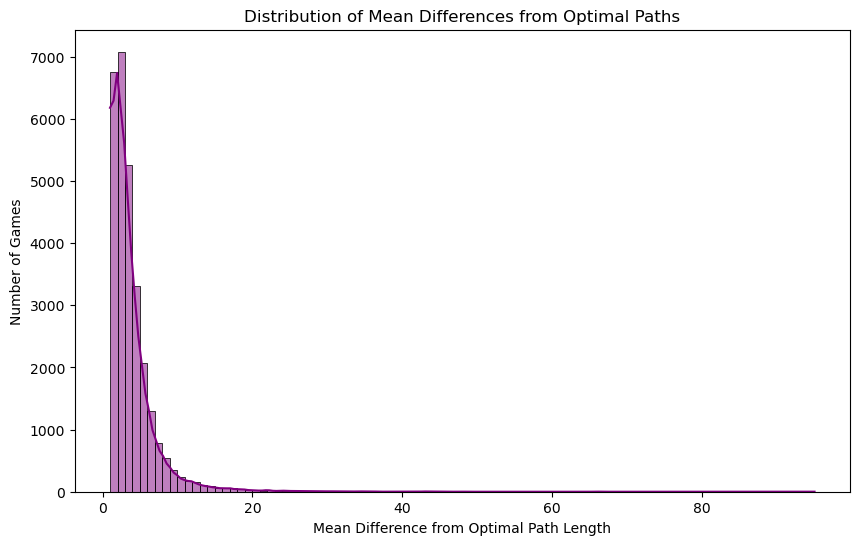

In [116]:
# idk if the mean would give us some other insight, looks pretty similar
agg_human_played_finished['mean_diff_from_optimal'] = (agg_human_played_finished['mean_path_length'] - agg_human_played_finished['optimal_path_length'])
plt.figure(figsize=(10,6))
sns.histplot(agg_human_played_finished['mean_diff_from_optimal'], binwidth=1, color="purple", kde=True)

plt.xlabel("Mean Difference from Optimal Path Length")
plt.ylabel("Number of Games")
plt.title("Distribution of Mean Differences from Optimal Paths")
plt.show()

In [126]:
overall_mean_diff = agg_human_played_finished['mean_diff_from_optimal'].mean()
print("The overall MEAN difference of human played games from optimal path length is ", overall_mean_diff)

The overall MEAN difference of human played games from optimal path length is  3.5763816290006263


In [ ]:
# maybe we look at variability of path length..
agg_human_played_finished['path_length_range'] = (agg_human_played_finished['max_path_length'] - agg_human_played_finished['min_path_length'])
agg_human_played_finished



,source,target,num_games,min_path_length,max_path_length,mean_path_length,median_path_length,optimal_path_length,median_diff_from_optimal,mean_diff_from_optimal,path_length_range
0,1 Ceres,Indian Ocean,1,5,5,5.0,5.0,3.0,2.0,2.0,0
1,1 Ceres,John Locke,2,5,7,6.0,6.0,3.0,3.0,3.0,2
2,1 Ceres,London,2,5,9,7.0,7.0,2.0,5.0,5.0,4
3,1 Ceres,"Miami, Florida",1,3,3,3.0,3.0,2.0,1.0,1.0,0
4,1 Ceres,Sputnik 2,1,8,8,8.0,8.0,4.0,4.0,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...
28688,Zulu,Language,1,3,3,3.0,3.0,2.0,1.0,1.0,0
28689,Zulu,Slovenia,2,4,5,4.5,4.5,3.0,1.5,1.5,1
28690,Zürich,Billie Holiday,1,5,5,5.0,5.0,4.0,1.0,1.0,0
28691,Zürich,Mediterranean Sea,1,4,4,4.0,4.0,2.0,2.0,2.0,0


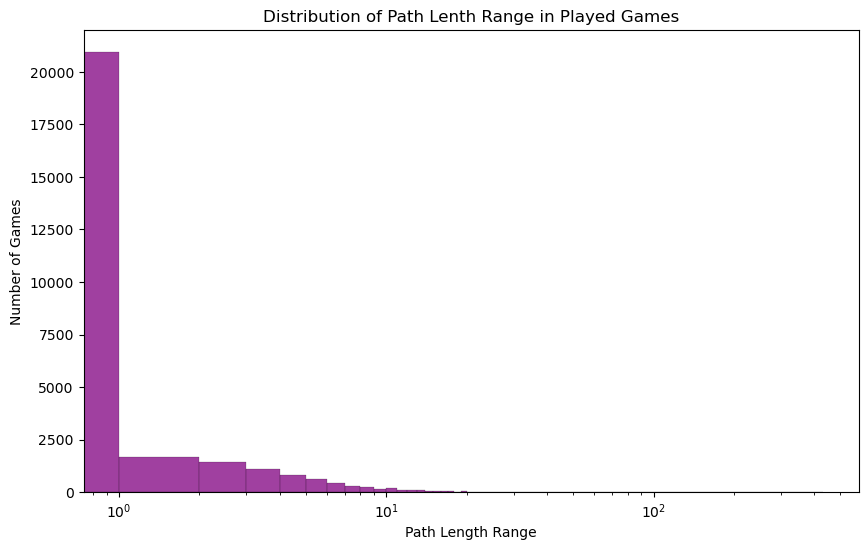

In [124]:
plt.figure(figsize=(10,6))
sns.histplot(agg_human_played_finished['path_length_range'], binwidth=1, color="purple")


#doesnt look great, make apply log scales
plt.xscale("log")
#plt.yscale("log")
plt.xlabel("Path Length Range")
plt.ylabel("Number of Games")
plt.title("Distribution of Path Lenth Range in Played Games")
plt.show()